In [1]:
# Import necessary packages
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Define a test file (replace with the path to your own!)
f = "notebooks/data/PACE_OCI.20240601_20240630.L3m.MO.LANDVI.V3_0.0p1deg.nc"

# Open to check
ds = xr.open_dataset(f)
ds

<xarray.Dataset> Size: 259MB
Dimensions:  (lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (lat, lon) float32 26MB ...
    evi      (lat, lon) float32 26MB ...
    ndwi     (lat, lon) float32 26MB ...
    ndii     (lat, lon) float32 26MB ...
    cci      (lat, lon) float32 26MB ...
    ndsi     (lat, lon) float32 26MB ...
    pri      (lat, lon) float32 26MB ...
    cire     (lat, lon) float32 26MB ...
    car      (lat, lon) float32 26MB ...
    mari     (lat, lon) float32 26MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.0
    data_bins:                         1516050
    data_minimum:                      -591.2403
    data_maximum:                      76.28943

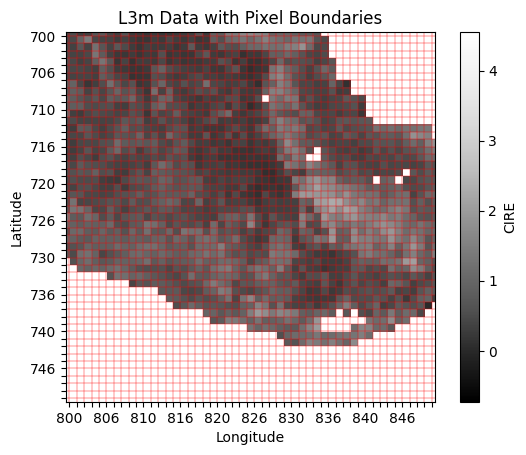

In [7]:
# Define a figure
plt.figure()

# Plot the data as background
plt.imshow(ds.cire, interpolation='nearest', cmap='Greys_r')

# Set up the axes
ax = plt.gca()

# L3M data is defined with unit pixels whose centres are on the integer coordinates
# So the boundaries are +-0.5 
ax.set_xticks(np.arange(ds.cire.shape[1]) + 0.5)
ax.set_yticks(np.arange(ds.cire.shape[0]) + 0.5)

# This is just for the plot to make the tick labels legible
new_labels = []
for i, label in enumerate(ax.get_xticklabels()):
    if i % 5 == 0:  # Keep every other label (0th, 2nd, 4th, etc.)
        new_labels.append(label.get_text())
    else:
        new_labels.append('')
ax.set_xticklabels(new_labels)
new_labels = []
for i, label in enumerate(ax.get_yticklabels()):
    if i % 5 == 0:
        new_labels.append(label.get_text())
    else:
        new_labels.append('')
ax.set_yticklabels(new_labels)

# Plot with the px boundaries as a grid
ax.grid(color='r', linestyle='-', linewidth=0.3)
ax.set_xlim([800, 850])

# Because the data is collected south to north, ylim = [s, n]
ax.set_ylim([750, 700])
plt.title("L3m Data with Pixel Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add colourbar
plt.colorbar(label="CIRE")
plt.show()

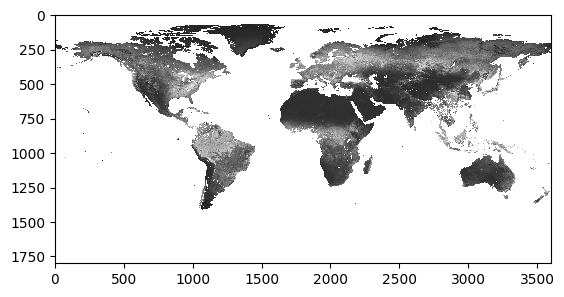

In [3]:
# This helps for picking pixel numbers for xlim/ylim
plt.imshow(ds.cire, interpolation='nearest', cmap='Greys_r')